In [233]:
from pylab import  * 
import pandas as pd
import datetime

In [234]:
df= pd.read_csv("news_dataset_cl.csv")

In [237]:
df2 = df[["news_id","statement","fact_url", "label", "lang", "time"]]
print(len(df2[df2["label"]=="fake"]), len(df2))

5013 9457


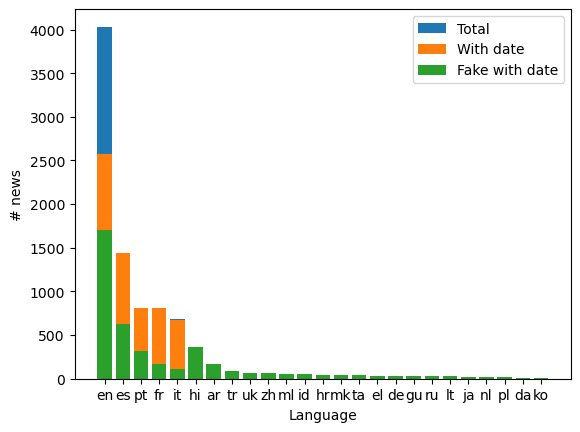

In [238]:

filter_count = "label" 
an_lang   = pd.DataFrame(df2.groupby("lang")[filter_count].count())
languages = an_lang.sort_values(by=filter_count, ascending=False).head(25)
bar(languages.index, languages[filter_count],label="Total")
ylabel("# news")
xlabel("Language")
filter_count = "time" 
an_lang   = pd.DataFrame(df2.groupby("lang")[filter_count].count())
languages = an_lang.sort_values(by=filter_count, ascending=False).head(25)
bar(languages.index, languages[filter_count], label="With date")

filter_count = "time" 
an_lang   = pd.DataFrame(df2[df2["label"]=="fake"].groupby("lang")[filter_count].count())
languages = an_lang.sort_values(by=filter_count, ascending=False).head(25)
bar(languages.index, languages[filter_count], label="Fake with date")
legend()

# All news

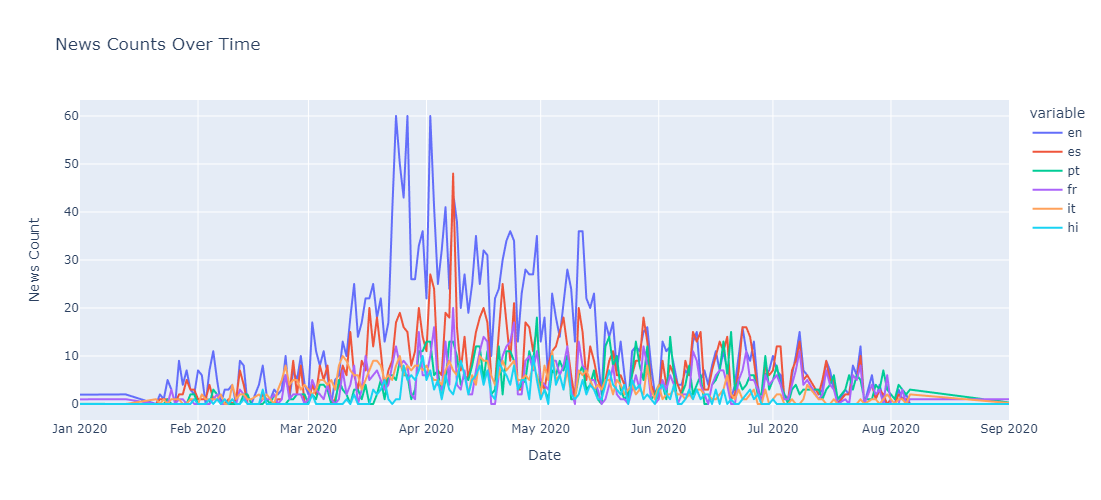

In [242]:

languages_analyze = ["en", "es","pt", "fr", "it", "hi"]
count_news        = []
for i in languages_analyze:
    df_lang = pd.DataFrame(df2[df2["lang"]==i].groupby("time")["news_id"].count())
    df_new = df_lang.rename(columns={'news_id': i})
    count_news.append(df_new)
result  = pd.concat(count_news, axis=1)
results = result.fillna(0)   
df = results

# Convert the 'time' column to a datetime format
df['time_1'] = pd.to_datetime(df.index, format='%d/%m/%Y')

df = df.sort_values(by='time_1')
# Create a time series plot using Plotly
fig = px.line(df, x='time_1', y=df.columns, title='News Counts Over Time')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='News Count')
start_date = pd.to_datetime("2020-01-01")
end_date = pd.to_datetime("2020-09-01")
fig.update_xaxes(range=[start_date, end_date])
fig.update_layout(width=800, height=500)
fig.show()

In [ ]:
df_query = df2[""]

# Fake news

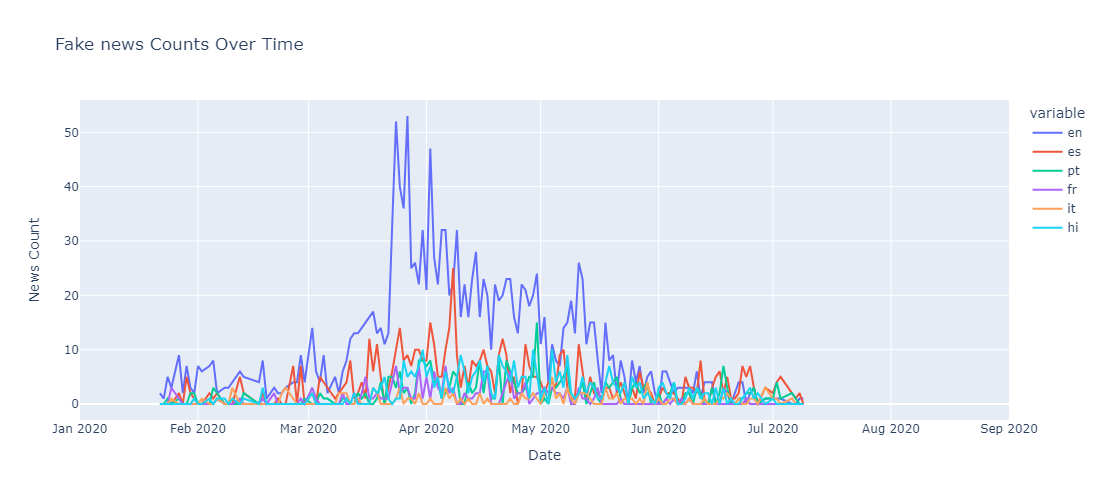

In [244]:

languages_analyze = ["en", "es","pt", "fr", "it", "hi"]
count_news        = []
for i in languages_analyze:
    df_query = df2 
    df_lang = pd.DataFrame(df2[ (df2["lang"]==i) & (df2["label"]=="fake") ].groupby("time")["news_id"].count())
    df_new = df_lang.rename(columns={'news_id': i})
    count_news.append(df_new)
result  = pd.concat(count_news, axis=1)
results = result.fillna(0)   
df = results

# Convert the 'time' column to a datetime format
df['time_1'] = pd.to_datetime(df.index, format='%d/%m/%Y')

df = df.sort_values(by='time_1')
# Create a time series plot using Plotly
fig = px.line(df, x='time_1', y=df.columns, title='Fake news Counts Over Time')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='News Count')
start_date = pd.to_datetime("2020-01-01")
end_date = pd.to_datetime("2020-09-01")
fig.update_xaxes(range=[start_date, end_date])
fig.update_layout(width=800, height=500)
fig.show()